**Name : Rakshyak Basyal**

**Student ID: 2432209**

Regression Task

Dataset: updated_pollution_dataset.csv

Aligns with: SDG 3 (Good Health and Well-being)

Target Variable: Air Quality

In [3]:
# Mount Google Drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Exploratory Data Analysis (EDA) and Data Understanding

In [4]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [5]:
# Load the Dataset
file_path = "/content/drive/MyDrive/5CS037 - Concepts and Technologies of AI/Final Portfolio/Regression/updated_pollution_dataset.csv"
df = pd.read_csv(file_path)

# Dataset Overview
print("\nFirst 10 rows of the dataset:")
df.head(10)


First 10 rows of the dataset:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
# Identify the number of rows and columns in the dataset.
rows, columns = df.shape
print("Number of rows and columns in the dataset:")
print("Rows:",rows,"Columns:",columns)

Number of rows and columns in the dataset:
Rows: 5000 Columns: 10


In [8]:
# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [9]:
# Check the values in target column
print(df["Air Quality"].unique())  # See exact values
print(df["Air Quality"].value_counts())  # Check counts

['Moderate' 'Good' 'Hazardous' 'Poor']
Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64


In [10]:
# Mapping categorical values to numerical labels
df = pd.read_csv(file_path)
air_quality_mapping = {
    "Good": 1,
    "Moderate": 2,
    "Poor": 3,
    "Hazardous": 4
}

df["Air Quality"] = df["Air Quality"].astype(str).str.strip()  # Normalize
df["Air Quality"] = df["Air Quality"].map(air_quality_mapping)
# Verify the values after maping
print(df["Air Quality"].unique())  # Should output: [1, 2, 3, 4]
print(df["Air Quality"].value_counts())  # Verify correct instance counts
df.head()

[2 1 4 3]
Air Quality
1    2000
2    1500
3    1000
4     500
Name: count, dtype: int64


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,1
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,1


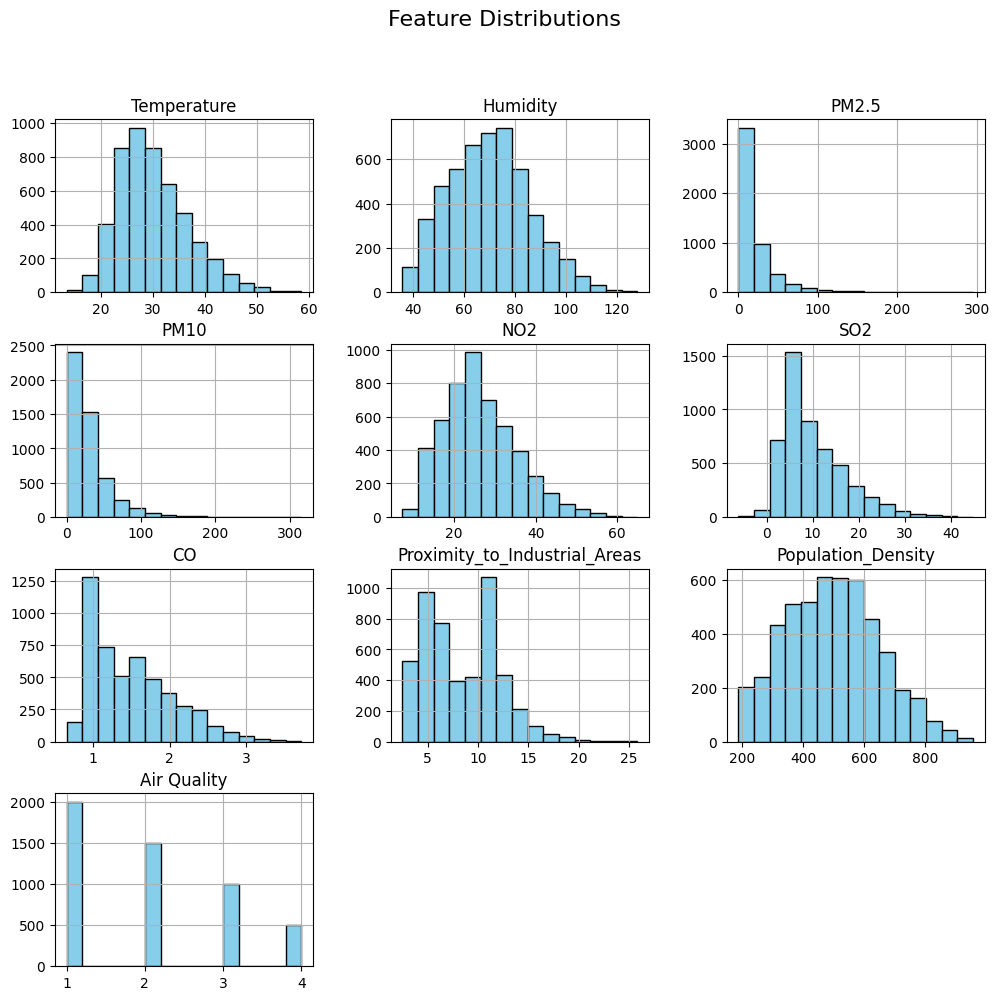

In [11]:
# Feature Distributions
df.hist(figsize=(12, 11), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

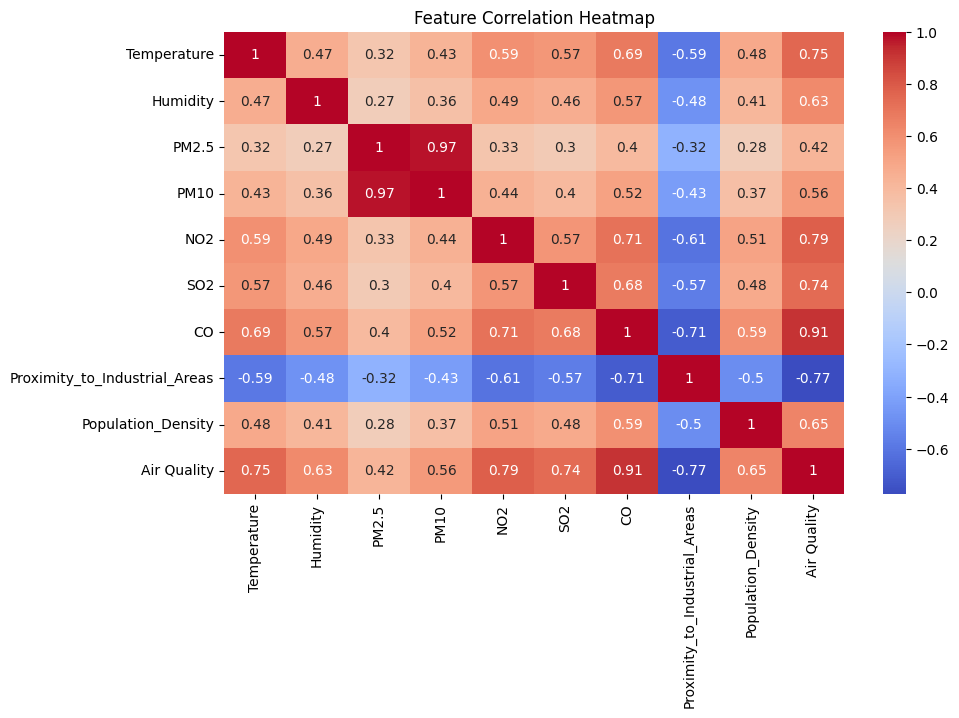

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

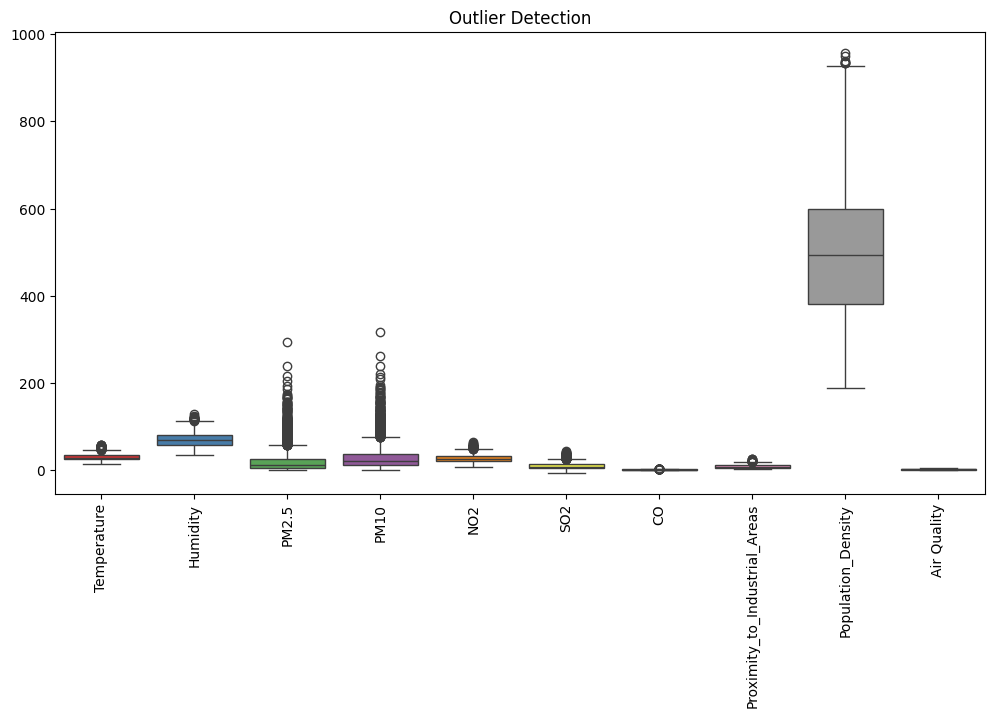

In [13]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="Set1")
plt.xticks(rotation=90)
plt.title("Outlier Detection")
plt.show()

### 2. Linear Regression From Scratch

In [14]:


# Define features (X) and target (y)
X = df.drop(columns=["Air Quality"])  # Independent variables
y = df["Air Quality"]  # Dependent variable

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (4000, 9), Testing Set: (1000, 9)


In [15]:
#Implementing Linear Regression From Scratch
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train the model
model_scratch = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model_scratch.fit(X_train.values, y_train.values)

# Predictions
y_pred_train = model_scratch.predict(X_train.values)
y_pred_test = model_scratch.predict(X_test.values)


In [16]:
# Check for missing values in input features
print("Missing values in X_train before filling:", X_train.isnull().sum().sum())
print("Missing values in X_test before filling:", X_test.isnull().sum().sum())

# Fill missing values with median (or use dropna() if necessary)
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_test.median())

# Verify missing values are handled
print("Missing values in X_train after filling:", X_train.isnull().sum().sum())
print("Missing values in X_test after filling:", X_test.isnull().sum().sum())


Missing values in X_train before filling: 0
Missing values in X_test before filling: 0
Missing values in X_train after filling: 0
Missing values in X_test after filling: 0


In [17]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)  # Fit model on cleaned data

# Print model parameters to confirm training
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Model Coefficients: [ 1.76209257e-02  4.46701563e-03 -1.63650797e-02  1.72948917e-02
  1.67104266e-02  1.73114513e-02  7.05284859e-01 -3.51213617e-02
  4.97512705e-04]
Model Intercept: -0.6589216897685737


In [18]:
# Generate predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Check if predictions contain NaN
print(f"y_pred_train NaN count: {pd.Series(y_pred_train).isnull().sum()}")
print(f"y_pred_test NaN count: {pd.Series(y_pred_test).isnull().sum()}")

# If predictions contain NaN, replace them with zeros
y_pred_train = np.nan_to_num(y_pred_train)
y_pred_test = np.nan_to_num(y_pred_test)


y_pred_train NaN count: 0
y_pred_test NaN count: 0


In [19]:
# Compute metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation results
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")


Train MSE: 0.0691, Test MSE: 0.0706
Train R²: 0.9302, Test R²: 0.9320


## 3. Machine Learning Models

In [20]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

In [21]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt_train = dt_model.predict(X_train)
y_pred_dt_test = dt_model.predict(X_test)

In [22]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

In [23]:
# Evaluate Function
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name):
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"\n{model_name} Performance:")
    print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
    print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
    print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
    print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")

# Evaluate Linear Regression
evaluate_model(y_train, y_pred_lr_train, y_test, y_pred_lr_test, "Linear Regression")

# Evaluate Decision Tree Regressor
evaluate_model(y_train, y_pred_dt_train, y_test, y_pred_dt_test, "Decision Tree Regressor")

# Evaluate Random Forest Regressor
evaluate_model(y_train, y_pred_rf_train, y_test, y_pred_rf_test, "Random Forest Regressor")



Linear Regression Performance:
Train MSE: 0.0691, Test MSE: 0.0706
Train RMSE: 0.2629, Test RMSE: 0.2657
Train MAE: 0.1991, Test MAE: 0.2014
Train R²: 0.9302, Test R²: 0.9320

Decision Tree Regressor Performance:
Train MSE: 0.0000, Test MSE: 0.0800
Train RMSE: 0.0000, Test RMSE: 0.2828
Train MAE: 0.0000, Test MAE: 0.0780
Train R²: 1.0000, Test R²: 0.9230

Random Forest Regressor Performance:
Train MSE: 0.0058, Test MSE: 0.0386
Train RMSE: 0.0761, Test RMSE: 0.1964
Train MAE: 0.0304, Test MAE: 0.0827
Train R²: 0.9941, Test R²: 0.9629


### 4. Hyper-parameter Optimization with Cross-Validation

In [24]:
# Define Hyperparameter Grids

# Decision Tree hyperparameter grid
dt_params = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["squared_error", "absolute_error"]
}

# Random Forest hyperparameter grid
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["squared_error", "absolute_error"]
}


In [25]:
# Randomized Search for Decision Tree
dt_random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42),
                                      param_distributions=dt_params,
                                      n_iter=10,
                                      cv=5,
                                      scoring="neg_mean_squared_error",
                                      random_state=42,
                                      n_jobs=-1)

dt_random_search.fit(X_train, y_train)
print("Best Decision Tree Parameters:", dt_random_search.best_params_)

# Randomized Search for Random Forest
rf_random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                      param_distributions=rf_params,
                                      n_iter=10,
                                      cv=5,
                                      scoring="neg_mean_squared_error",
                                      random_state=42,
                                      n_jobs=-1)

rf_random_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_random_search.best_params_)


Best Decision Tree Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'squared_error'}
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'squared_error'}


### 5. Feature Selection

In [26]:
# Train Random Forest on the full dataset to get feature importance
best_rf = RandomForestRegressor(**rf_random_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Get feature importance scores
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)

                         Feature  Importance
6                             CO    0.851537
7  Proximity_to_Industrial_Areas    0.076066
4                            NO2    0.021229
0                    Temperature    0.013719
5                            SO2    0.011597
1                       Humidity    0.010257
8             Population_Density    0.008600
3                           PM10    0.004006
2                          PM2.5    0.002988


In [27]:
#Select top features
# Set a threshold for feature importance (e.g., keep top 5 features)
top_n = 5
selected_features = feature_importances.head(top_n)["Feature"].tolist()

print("Selected Features:", selected_features)

# Reduce dataset to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Selected Features: ['CO', 'Proximity_to_Industrial_Areas', 'NO2', 'Temperature', 'SO2']


### 6. Final Model

In [28]:
# Use the Best Features
# Select the top features based on feature importance
selected_features = ['CO', 'Proximity_to_Industrial_Areas', 'NO2', 'Temperature', 'SO2']  # Example, modify based on your results

# Reduce the dataset to selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [29]:
# Train the final model
# Best hyperparameters from tuning (modify as needed)
best_dt_params = {"max_depth": 10, "min_samples_split": 5, "min_samples_leaf": 2}
best_rf_params = {"n_estimators": 100, "max_depth": 20, "min_samples_split": 2, "min_samples_leaf": 1}

# Train Final Decision Tree
final_dt = DecisionTreeRegressor(**best_dt_params, random_state=42)
final_dt.fit(X_train_selected, y_train)

# Train Final Random Forest
final_rf = RandomForestRegressor(**best_rf_params, random_state=42)
final_rf.fit(X_train_selected, y_train)


RandomForestRegressor(max_depth=20, random_state=42)

In [30]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"\n{model_name} Performance:")
    print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")
    print(f"Train RMSE: {rmse_train:.4f}, Test RMSE: {rmse_test:.4f}")
    print(f"Train MAE: {mae_train:.4f}, Test MAE: {mae_test:.4f}")
    print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")

# Evaluate both models
evaluate_model(final_dt, X_train_selected, y_train, X_test_selected, y_test, "Final Decision Tree")
evaluate_model(final_rf, X_train_selected, y_train, X_test_selected, y_test, "Final Random Forest")



Final Decision Tree Performance:
Train MSE: 0.0270, Test MSE: 0.0602
Train RMSE: 0.1642, Test RMSE: 0.2453
Train MAE: 0.0518, Test MAE: 0.0848
Train R²: 0.9728, Test R²: 0.9421

Final Random Forest Performance:
Train MSE: 0.0068, Test MSE: 0.0440
Train RMSE: 0.0825, Test RMSE: 0.2099
Train MAE: 0.0338, Test MAE: 0.0883
Train R²: 0.9931, Test R²: 0.9576


In [31]:
# Compare models based on R² score (higher is better)
r2_dt = r2_score(y_test, final_dt.predict(X_test_selected))
r2_rf = r2_score(y_test, final_rf.predict(X_test_selected))

best_model_name = "Final Decision Tree" if r2_dt > r2_rf else "Final Random Forest"
best_r2_score = max(r2_dt, r2_rf)

print(f"Best Final Model: {best_model_name} with Test R² Score: {best_r2_score:.4f}")


Best Final Model: Final Random Forest with Test R² Score: 0.9576
